<a href="https://colab.research.google.com/github/PQHSGS/Quick_draw-using-Air-gesture/blob/main/Quick_draw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
npy_files = [f for f in os.listdir('/content/drive/MyDrive/Colab Notebooks/Datasets/Trung thu_VME') if f.endswith('.npy')]
npy_files.sort()
image=[]
labels=[]
classes=[]
num=0
img_num=25000
id=np.random.randint(1,100000,img_num)
for file in npy_files:
  label=file.split('_')[-1].split('.')[0]
  data = np.load(os.path.join('/content/drive/MyDrive/Colab Notebooks/Datasets/Trung thu_VME', file,))
  data=data.reshape(data.shape[0],28,28)
  image.extend(data[id])
  for _ in range(img_num):
    labels.append(label[:img_num])
    classes.append(num)
  num+=1
image=np.array(image)
labels=np.array(labels)
classes=np.array(classes)
print(np.unique(labels,return_counts=True))

(array(['apple', 'banana', 'cake', 'cruise ship', 'face', 'fish', 'flower',
       'lantern', 'lion', 'moon', 'pear', 'pineapple', 'rabbit', 'star',
       'strawberry', 'tree', 'watermelon'], dtype='<U11'), array([25000, 25000, 25000, 25000, 25000, 25000, 25000, 25000, 25000,
       25000, 25000, 25000, 25000, 25000, 25000, 25000, 25000]))


In [ ]:
import cv2

# Create a new list to store the resized images
resized_images = []
SIZE=32
for i in range(image.shape[0]):
  resized_image = cv2.resize(image[i], (SIZE, SIZE))
  resized_images.append(resized_image)

# Convert the list of resized images to a NumPy array
image = np.array(resized_images)

Text(0.5, 1.0, 'cruise ship')

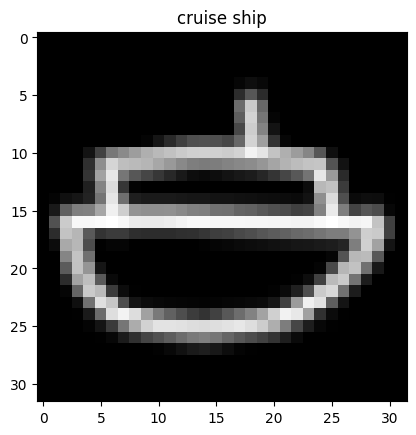

In [ ]:
id=random.randint(0,len(image))
plt.imshow(image[id],cmap='gray')
plt.title(labels[id])

In [ ]:
from sklearn.model_selection import train_test_split
full_train_images, test_images, full_train_classes, test_classes_1 = train_test_split(image, classes, test_size=0.2, random_state=42, stratify=classes)
train_images, val_images, train_classes_1, val_classes_1 = train_test_split(full_train_images, full_train_classes, test_size=0.25, random_state=42, stratify=full_train_classes)

In [ ]:
from keras.utils import to_categorical
train_classes = to_categorical(train_classes_1)
val_classes = to_categorical(val_classes_1)
test_classes = to_categorical(test_classes_1)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAvgPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

**VGG**

In [ ]:
len=train_classes.shape[1]
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
model.add(Conv2D(32,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(len,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

In [ ]:
epoch=50
batch=256
callback=[EarlyStopping(monitor='val_loss',patience=10,verbose=0,restore_best_weights=True)]
H=model.fit(train_images,train_classes,epochs=epoch,batch_size=batch,validation_data=(val_images,val_classes),callbacks=[callback])


Epoch 1/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.6373 - loss: 1.1541 - val_accuracy: 0.8526 - val_loss: 0.4990
Epoch 2/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8702 - loss: 0.4317 - val_accuracy: 0.8724 - val_loss: 0.4311
Epoch 3/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8879 - loss: 0.3750 - val_accuracy: 0.8904 - val_loss: 0.3688
Epoch 4/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.8998 - loss: 0.3298 - val_accuracy: 0.8907 - val_loss: 0.3788
Epoch 5/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9072 - loss: 0.3073 - val_accuracy: 0.8962 - val_loss: 0.3505
Epoch 6/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9149 - loss: 0.2863 - val_accuracy: 0.9011 - val_loss: 0.3422
Epoch 7/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9183 - loss: 0.2708 - val_accuracy: 0.9022 - val_loss: 0.3394
Epoch 8/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9218 - loss: 0.2582 - 

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Datasets/weights_VGG_new.h5',save_format='h5')

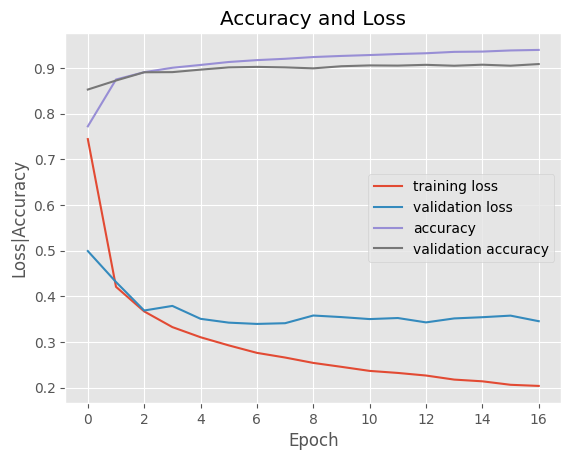

In [ ]:
last_epoch=17
plt.style.use('ggplot')
fig = plt.figure()
plt.plot(np.arange(0,last_epoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0,last_epoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0,last_epoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0,last_epoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
predicts=model.predict(test_images)
predicts=np.argmax(predicts,axis=1)

2

In [ ]:
test_classes=np.argmax(test_classes,axis=1)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_classes,predicts))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5000
           1       0.85      0.89      0.87      5000
           2       0.89      0.92      0.91      5000
           3       0.93      0.89      0.91      5000
           4       0.95      0.91      0.93      5000
           5       0.95      0.94      0.94      5000
           6       0.95      0.89      0.92      5000
           7       0.85      0.86      0.85      5000
           8       0.87      0.88      0.87      5000
           9       0.84      0.80      0.82      5000
          10       0.91      0.93      0.92      5000
          11       0.86      0.93      0.89      5000
          12       0.91      0.90      0.90      5000
          13       0.96      0.95      0.95      5000
          14       0.92      0.87      0.89      5000
          15       0.92      0.96      0.94      5000
          16       0.87      0.89      0.88      5000

    accuracy              